# Introduction to Business Analytics



Participants: 

- Elli Georgiou: s223408
- Maria Katarachia: s213633
- Stavroula Douva: s222652
- Michail-Achillefs Katarachias: s222653 
- Dimitris Voukatas: s230148



# Table of Content
Section 1: **Introduction + Data Analysis \& Visualizations**<br> <br>
Section 2: **Prediction models**<br> <br>
Section 3: **Exploratory Component** <br> <br>
Section 4: **Conclusions**<br> <br>

# Section 1 : Introduction and Data Analysis and Visualizations

In this first section, we embark on the analysis of our dataframe, aiming to transform it into a higher-quality set that can provide meaningful insights for the subsequent phases of this project. The first crucial step involves preprocessing, which includes cleaning and organizing the dataset.

Cleaning is of paramount importance, encompassing tasks such as handling missing values, removing duplicates, and addressing outliers. These actions ensure that the data is reliable and free from errors, setting the foundation for robust analysis.

Following this approach, we filter the data based on relevant criteria. For instance, we seek data that adheres to logical parameters; for example, age should fall within a specific range, trip duration should follow a consistent format, and station locations must be within the boundaries of New York territory.

Once the data is cleaned and preprocessed, visualization emerges as a powerful tool for gaining initial insights. Visual representations, such as histograms, scatter plots, and correlation matrices, offer a holistic view, unveiling potential patterns, trends, or relationships throughout the dataset.

## Setup

Firstly, we import all the libraries that will be used in this project.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import torch
import torch.nn as nn
import torch.optim as optim
from time import time

## Data importing

We open the file and create a folder for our plots as well.

In [2]:
file_path = 'Trips_2018.csv'

if not os.path.exists('plots'):
    os.makedirs('plots')

with open(file_path, 'r') as f:
    df = pd.read_csv(f)

# Data cleaning 

Let's take a look at how our dataframe appears.

In [3]:
# We are checking the data types of our dataframe to see that are on the appropiate type and also the dimensions of our dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17548339 entries, 0 to 17548338
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Unnamed: 0               int64  
 1   tripduration             int64  
 2   starttime                object 
 3   stoptime                 object 
 4   start_station_id         float64
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_latitude     float64
 9   end_station_longitude    float64
 10  bikeid                   int64  
 11  usertype                 object 
 12  birth_year               int64  
 13  gender                   int64  
dtypes: float64(6), int64(5), object(3)
memory usage: 1.8+ GB


In [4]:
# We are dropping the first column because it is just an index.
df = df.drop(df.columns[0], axis=1) 
df = df.sample(n=5000000, random_state=42)

## Missing values

In [5]:
# We check if there are any null values in our dataframe.
df.isnull().sum()

tripduration                 0
starttime                    0
stoptime                     0
start_station_id           740
start_station_latitude       0
start_station_longitude      0
end_station_id             740
end_station_latitude         0
end_station_longitude        0
bikeid                       0
usertype                     0
birth_year                   0
gender                       0
dtype: int64

In [6]:
# We also check that there are no duplicates.
df.duplicated().sum()

0

We will remove the rows from the dataset that have null or non-numeric values in "start_station_id" and "end_station_id." The dataset only contains rows with valid numeric station IDs by converting these columns to numeric using the 'coerce' option. Any non-numeric values are then set as NaN, and rows containing these NaN values will be removed. The dataset's integrity will be improved for upcoming analyses with this step.

In [7]:
# We remove null values for start_station_id and end_station_id.
df = df[pd.to_numeric(df['start_station_id'], errors='coerce').notnull()]
df = df[pd.to_numeric(df['end_station_id'], errors='coerce').notnull()]


## Formating

 A great deal of focus was put on standardizing and extracting important time-based components from our dataset during the initial phase of our data analysis. We used a function to convert the columns to datetime format. This conversion guarantees accuracy and consistency in the time data representation, which is essential for any analysis that is time-sensitive. The date, hour, and day of the week, three crucial temporal components, were then taken out of the'start_time' column. This extraction plays a crucial role in providing a detailed analysis of the data, enabling insights into weekly and daily trends, and comprehending patterns of activity throughout the day. This fundamental stage of data processing paves the way for a more in-depth and perceptive examination, enabling us to identify significant trends and conclusionsfrom our dataset's temporal features.


In [8]:
# Convert start_time and end_time columns to datetime format.
df['starttime'] = pd.to_datetime(df['starttime'])
df['stoptime'] = pd.to_datetime(df['stoptime'])

# Extract date, hour, and day of the week from start_time column.
df['date'] = df['starttime'].dt.date
df['hour'] = df['starttime'].dt.hour
df['day_of_week'] = df['starttime'].dt.dayofweek

## Filtering

We used strict filters during the data cleansing process to improve the quality of the data. The dataset was further refined by eliminating trips that fell outside of the 99th percentile of trip durations, as well as entries with negative or abnormally long trip durations (more than 24 hours). In order to prevent skewing age-related analysis, we also filtered out records whose birth years fell below the lower 99th percentile, keeping only entries with valid gender values (0, 1, or 2). These actions were essential to maintaining the integrity of the dataset and providing a strong basis for precise and perceptive analysis.

In [9]:
# Drop any rows with negative trip durations.
df = df[df['tripduration'] > 0]

# Drop any rows with trip durations greater than 24 hours.
df = df[df['tripduration'] <= 3600]

# Drop rows that are outside the 99th percentile of trip durations.
df = df[df['tripduration'] <= df['tripduration'].quantile(.99)]

# Drop rows where the birth_year is outside the lower 99th percentile of birth years.
df = df[df['birth_year'] >= df['birth_year'].quantile(.01)]

# Drop rows whsere the gender is not 0, 1 or 2.
df = df[df['gender'].isin([0, 1, 2])]
# Drop rows where the gender is not 0, 1 or 2.
df = df[df['gender'].isin([0, 1, 2])]


Descriptive statistics

# Visualizations

We visualize our data to gain useful insights.

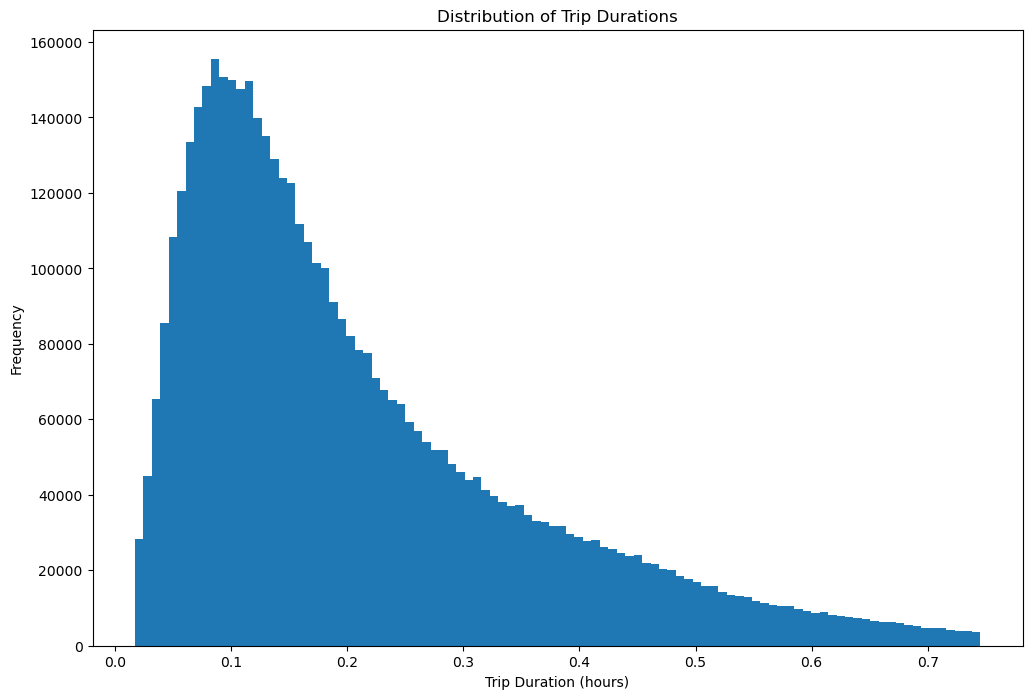

In [10]:
# Distribution of trip durations
plt.figure(figsize=(12, 8))
plt.hist(df['tripduration']/3600, bins=100)
plt.xlabel('Trip Duration (hours)')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Durations')
plt.savefig(os.path.join('plots', 'trip_duration_distribution.png'))
plt.show()


The provided histogram displays the distribution of trip durations, expressed in hours, for a dataset of travels. The distribution seems to be right-skewed, suggesting that shorter trips are significantly more frequent than longer ones. Most trips are shorter than 0.1 hours, and as trip length increases, frequency gradually decreases. Very short trips appear to be the norm in this dataset, as indicated by a sharp decline beyond the 0.1-hour mark. Although these instances are comparatively uncommon, the existence of trips lasting up to 0.8 hours (nearly 50 minutes) suggests some variability in trip length. This graphic aids in comprehending the usual usage patterns and can be extremely important for operational planning, including staffing needs and inventory control. The skewness of the plot towards shorter durations may also have an impact on policy choices, such as price plans or special offers, to accommodate the most typical travel times.

We are checking the age of our users, and it seems that our customers are within a reasonable age range.

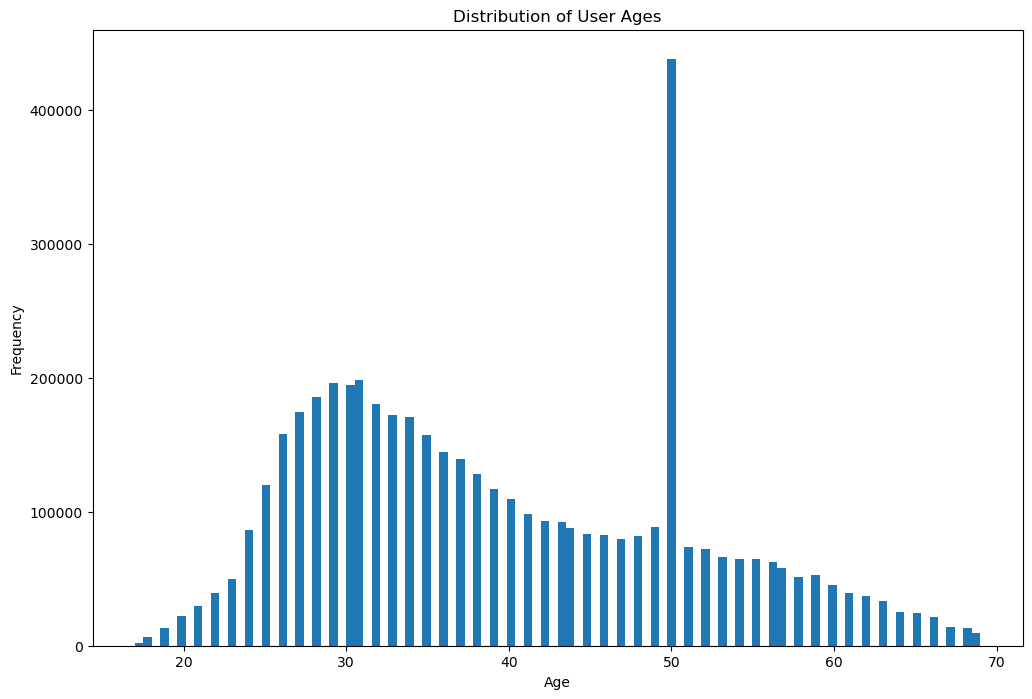

In [11]:
# Age distribution of the users.
plt.figure(figsize=(12, 8))
plt.hist(2019 - df['birth_year'], bins=100)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of User Ages')
plt.savefig(os.path.join('plots', 'age_distribution.png'))
plt.show()


The age distribution of users from the dataset is shown in the histogram. The age is determined by subtracting the user's birth year from the current year (2019). The distribution exhibits a bell-shaped curve with a prominent peak at thirty years of age, indicating that most users are between the ages of twenty and thirty. This peak indicates that there is a significant user concentration in this age range. Notably, there is an odd peak around the age of 50, which might be the result of a default input value, a data error, or a sizable user base of users in that age range. For younger (<20 years) and older (>60 years) age groups, the distribution tapers off, suggesting lower service engagement in these groups.



We want to observe the gender distrubution as well.

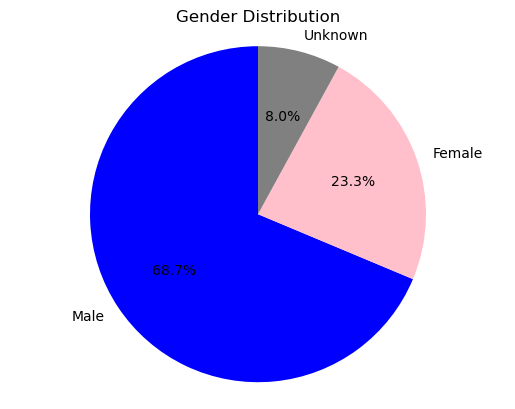

In [12]:
gender_counts = df['gender'].value_counts()

gender_counts

labels = ['Male', 'Female', 'Unknown']
colors = ['blue', 'pink', 'gray']

fig = plt.figure(facecolor='white')
plt.pie(gender_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.title('Gender Distribution')
plt.show()

The gender distribution within a user dataset is shown visually in a pie chart. With 68.2% of the population, men make up the majority, followed by women with 23.2%. In addition, 8.6% of the user base is shown on the chart as "Unknown," which may indicate users who would rather withhold their gender or other information that was not collected. The service may be more well-liked by men, as suggested by the preponderance of male users, or it may be a reflection of larger industry trends. The substantial percentage of users who do not identify their gender points to a potential improvement area for data collection, or it suggests a varied user base with a range of gender identities. 

Now that we have completed the initial phase of our data preparation, we have a carefully selected dataframe that is ready for more complex analytical tasks. Our dataset is in the exact format needed for the complex tasks that lie ahead due to the transformation and cleaning processes that have been carried out. We have created a solid basis for our analysis by standardizing time-related columns to datetime formats, judiciously removing outliers, and carefully classifying demographic data like age and gender.


With this improved dataset, we can now explore more complex clustering algorithms, which will help us identify underlying patterns and groupings in the data. Furthermore, the foundation we've laid enables us to confidently use predictive modeling methods. These models will make better predictions about future trends, user behavior, and service demands by utilizing the rich, cleaned data. Thus, in later phases of our project, our preparatory work will play a pivotal role in facilitating deeper insights and data-driven decision-making.


# Descriptive study

## Clustering

Here we have started the clustering phase of our ongoing data analysis evolution by using Principal Component Analysis (PCA) to comprehend the feature correlations in our cleaned dataset. The foundation for a successful PCA is laid by calculating the trip duration from the "start_time" and "stop_time," and then normalizing the dataset to include station locations, birth years, and trip durations. In order to guarantee that every feature contributes proportionately to the analysis a normalization is necessary. The dataset is then transformed by the PCA procedure, which reduces it to its essential elements so that the maximum variance is captured without sacrificing the original complexity. 

In [13]:
df['tripduration'] = (df['stoptime'] - df['starttime']).dt.total_seconds()


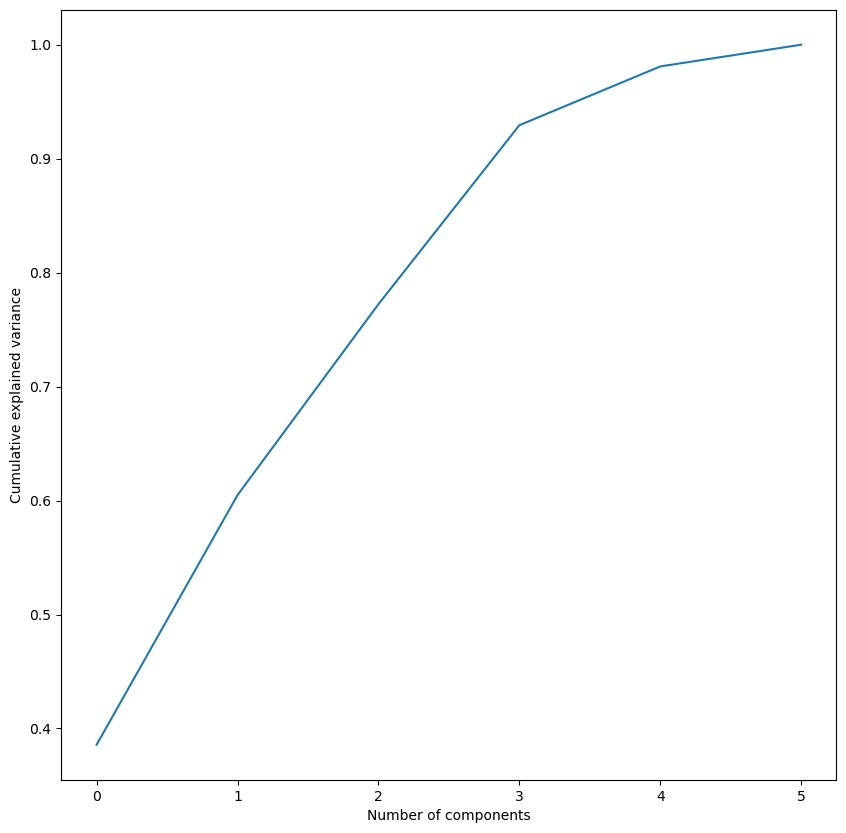


Principal Component 1 Loadings:
end_station_latitude       0.534724
start_station_latitude     0.532691
end_station_longitude      0.463838
start_station_longitude    0.463149
tripduration               0.023704
birth_year                -0.009755
Name: 0, dtype: float64

Principal Component 2 Loadings:
start_station_latitude     0.423059
end_station_latitude       0.417549
tripduration               0.204272
birth_year                -0.345242
start_station_longitude   -0.492779
end_station_longitude     -0.492872
Name: 1, dtype: float64

Principal Component 3 Loadings:
birth_year                 0.460564
end_station_latitude       0.180860
start_station_latitude     0.173851
end_station_longitude     -0.175021
start_station_longitude   -0.182169
tripduration              -0.813098
Name: 2, dtype: float64

Principal Component 4 Loadings:
birth_year                 0.817672
tripduration               0.544487
start_station_latitude     0.088736
end_station_latitude       0.079130
star

In [14]:
# Standardize the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df[['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'birth_year', 'tripduration']])
scaled_df = pd.DataFrame(scaled_df, columns=['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'birth_year', 'tripduration'])

# PCA using all the features
pca = PCA(n_components=6)
pca.fit(scaled_df)
pca_df = pca.transform(scaled_df)
pca_df = pd.DataFrame(pca.components_, columns=['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'birth_year', 'tripduration'])


plt.figure(figsize=(10, 10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.savefig(os.path.join('plots', 'pca_cumulative_explained_variance.png'))
plt.show()

corr_matrix = scaled_df.corr()
corr_matrix['tripduration'].sort_values(ascending=False)

# Print the loadings for each principal component
for i in range(len(pca_df)):
    print(f"\nPrincipal Component {i + 1} Loadings:")
    print(pca_df.iloc[i].sort_values(ascending=False))


It seems that the start_station_latitude , end_station_longitude  contain plethora of information for our problem.       

Plotting the cumulative explained variance against the number of components helps us visualize this transformation and informs our choice of how many components to keep. Our Principal Component Analysis (PCA) shows that the first three components, with the first being particularly dominant, account for the majority of the variance, as shown by the cumulative explained variance plot. Upon examining the loadings, we find that the first two components are significantly influenced by geographic coordinates, suggesting that location plays a major role in the variance of our data. The third component is mainly affected by the length of the trip, which may indicate that the duration of use is not affected by geographic factors. This information is important because it shows that trip duration and spatial features, for our dataset, capture the essential elements of user behavior. The first component emphasizes geographical data, while the third component points to temporal aspects. 

# Elbow method

In order to identify the optimal number of clusters for the clustering algorithm we chose the elbow method.

In [15]:
# Extract coordinates from the sample
coordinates_sample = df[['start_station_latitude', 'start_station_longitude']]

#Standardize the coordinates
scaler = StandardScaler()
coordinates_standardized = scaler.fit_transform(coordinates_sample)
# coordinates_sample = coordinates_standardized

#Elbow method
distortions = []
K = range(1, 40)  
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(coordinates_standardized)
    distortions.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(12, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Method for Optimal k with Sampled Data')
plt.show()


KeyboardInterrupt: 

To determine the ideal number of clusters for K-means clustering, utilize the Elbow Method plot. It displays a decrease in inertia as the number of clusters increases by plotting the number of clusters against the within-cluster sum of squares. The rate of decrease changes sharply at the optimal point, or "elbow," which in this case is approximately 5 clusters. This shows that after five clusters, more clusters do not significantly add to the variance explanation, suggesting that our data can be effectively divided into five groups.

Further processing with K-means clustering to remove locations we don't care about.

In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#Finding the optimal number of clusters with elbow method

# Extract coordinates from the sample
coordinates_start = df[['start_station_latitude', 'start_station_longitude']]
coordinates_end = df[['end_station_latitude', 'end_station_longitude']]

#Standardize the coordinates
scaler = StandardScaler()
coordinates_standardized = scaler.fit_transform(coordinates_start)

# Plot K-means with 20 clusters
kmeans = KMeans(n_clusters=20, random_state=42)
kmeans.fit(coordinates_standardized)
df['cluster'] = kmeans.predict(coordinates_standardized)

# Cluster the data into 20 clusters
kmeans = KMeans(n_clusters=20, init='k-means++', random_state=42).fit(coordinates_start)

# Get the cluster centers
centers = kmeans.cluster_centers_

# Add the cluster labels to the dataframe
df['cluster'] = kmeans.predict(coordinates_start)

/home/mike/miniconda3/envs/scientific/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/mike/miniconda3/envs/scientific/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Using our standardized start station coordinates and the K-means algorithm, we were able to cluster our dataset into 20 different groups. Each data point was assigned to a cluster by this process, and the output showed the hubs of activity in the center. The popularity of the station and user trends can be inferred from this clustering, which can help with operational and strategic decisions for station development and management.

Plot the clusters on a map.

In [17]:
import plotly.express as px

def plot_stations_map(stations):
    #First before plotting we have to deal with the outliers 
    #The latitude of New York City is approximately between 40.4774 and 45.01585, and the longitude is approximately between -79.76259 and -71.18507.

    lon_min = -79.76259
    lat_min = 40.4774
    lon_max = -71.18507
    lat_max = 45.01585

    # Store the stations that are within the boundaries
    stations = stations[
        (stations['start_station_latitude'] > lat_min) &
        (stations['start_station_latitude'] < lat_max) &
        (stations['start_station_longitude'] > lon_min) &
        (stations['start_station_longitude'] < lon_max)
    ]
    
    #Plot the stations with an underlying map of New York City
    title = 'Citi Bike Stations in New York City'
    fig = px.scatter_mapbox(
        stations,
        lat='start_station_latitude',
        lon='start_station_longitude',
        color='cluster',
        mapbox_style='carto-positron',
        zoom=9,
        width=1000,
        height=600
    )
    fig.update_layout(
        title=dict(
            text=title,
            x=0.5,  # Center the title horizontally
            xanchor='center',  # Anchor point for horizontal alignment
            font=dict(size=20)
        )
    )
    fig.show()


Remove the locations that are more than 3 standard deviations from the center of the clusters.

In [ ]:
# Calculate the distance between each point and its cluster center
distance = kmeans.transform(coordinates_start)

# Get the minimum distance for each point and its cluster index
min_distance = np.min(distance, axis=1)
min_distance_cluster = np.argmin(distance, axis=1)

threshold = 2*np.std(distance,axis=1)

# Get the indices of the points that are within the threshold distance of a cluster center
within_threshold = np.argwhere(min_distance < threshold).flatten()

# Remove the points that are outside the threshold distance of a cluster center
df = df.iloc[within_threshold]

# Plot the stations with an underlying map of New York City.
plot_stations_map(df)

The stations were clustered to find patterns in their locations using the KMeans algorithm. Subsequently, the analysis concentrated on ensuring a tighter and more relevant grouping by eliminating outliers, or stations located more than two standard deviations from the cluster centers, in order to refine these clusters.

The final graphic shows a map with stations colored by the clusters to which they belong. This map shows the locations of bike stations throughout the city as well as areas with a high density of stations. These kinds of insights are crucial for operational optimization because they can direct the placement of new stations strategically and the distribution of resources in a way that best serves user demand. By using this data, the Citi Bike program will be able to improve its service offerings and gain a better understanding of how people use it in New York City's urban environment.


Find the most important cluster and get all the relevant values from the dataframe based on it (MVC - Most Valuable Cluster).

In [18]:
# Sort the clusters by the number of trips (instances) in each cluster 
sorted_clusters= df['cluster'].value_counts().idxmax()

# Get the indices of the points that are in the most important cluster
most_important_cluster_indices = np.argwhere(df['cluster'] == sorted_clusters).flatten()

# Get the most important cluster's features
MVC = df.iloc[most_important_cluster_indices].copy()
MVC.info()
 

<class 'pandas.core.frame.DataFrame'>
Index: 478003 entries, 17229606 to 13130111
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   tripduration             478003 non-null  float64       
 1   starttime                478003 non-null  datetime64[ns]
 2   stoptime                 478003 non-null  datetime64[ns]
 3   start_station_id         478003 non-null  float64       
 4   start_station_latitude   478003 non-null  float64       
 5   start_station_longitude  478003 non-null  float64       
 6   end_station_id           478003 non-null  float64       
 7   end_station_latitude     478003 non-null  float64       
 8   end_station_longitude    478003 non-null  float64       
 9   bikeid                   478003 non-null  int64         
 10  usertype                 478003 non-null  object        
 11  birth_year               478003 non-null  int64         
 12  gender      

## Predictions

In [19]:
# Data preproccesing we keep only theccolumns we need
columns_to_remove = ['start_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_latitude','end_station_longitude','bikeid','day_of_week','usertype','birth_year','gender']
prediction_cluster = MVC.drop(columns=columns_to_remove, axis=1)
prediction_cluster

,tripduration,starttime,stoptime,date,hour,cluster
17229606,521.955,2018-12-18 20:12:15.062,2018-12-18 20:20:57.017,2018-12-18,20,4
15586679,1396.470,2018-11-07 08:00:02.037,2018-11-07 08:23:18.507,2018-11-07,8,4
6204180,553.300,2018-06-18 08:24:07.366,2018-06-18 08:33:20.666,2018-06-18,8,4
6605124,546.180,2018-06-15 14:43:39.614,2018-06-15 14:52:45.794,2018-06-15,14,4
10882812,2105.335,2018-08-22 16:36:20.666,2018-08-22 17:11:26.001,2018-08-22,16,4
...,...,...,...,...,...,...
4445373,353.016,2018-05-05 12:46:30.052,2018-05-05 12:52:23.068,2018-05-05,12,4
6555668,1655.015,2018-06-30 10:13:29.387,2018-06-30 10:41:04.402,2018-06-30,10,4
11548181,554.676,2018-09-01 16:15:59.272,2018-09-01 16:25:13.948,2018-09-01,16,4
16661423,797.854,2018-12-04 12:32:55.147,2018-12-04 12:46:13.001,2018-12-04,12,4


Pickups and dropoffs dataframes

In [20]:
# We order the elements of this dataframe based on the date.

prediction_cluster.sort_values(by = ['starttime'],inplace = True )
# We work on hourly intervals for pick ups
pickups = prediction_cluster.copy()
pickups.set_index('starttime', inplace=True)
hourly_pickups = pickups.resample('H').count()  
columns_to_drop = ['tripduration', 'stoptime', 'date', 'cluster']
hourly_pickups = hourly_pickups.rename(columns={'hour': 'pickup_counts'})
hourly_pickups = hourly_pickups.drop(columns=columns_to_drop)

hourly_pickups

,pickup_counts
starttime,
2018-01-01 00:00:00,2
2018-01-01 01:00:00,5
2018-01-01 02:00:00,2
2018-01-01 03:00:00,1
2018-01-01 04:00:00,1
...,...
2018-12-31 18:00:00,14
2018-12-31 19:00:00,3
2018-12-31 20:00:00,4


In [21]:
dropoffs = prediction_cluster.copy()
dropoffs.set_index('stoptime', inplace=True)
hourly_dropoffs = dropoffs.resample('H').count()
columns_to_drop = ['tripduration', 'starttime', 'date', 'cluster']
hourly_dropoffs = hourly_dropoffs.rename(columns={'hour': 'dropoff_counts'})
hourly_dropoffs = hourly_dropoffs.drop(columns=columns_to_drop)
hourly_dropoffs


,dropoff_counts
stoptime,
2018-01-01 00:00:00,2
2018-01-01 01:00:00,5
2018-01-01 02:00:00,2
2018-01-01 03:00:00,0
2018-01-01 04:00:00,2
...,...
2018-12-31 19:00:00,5
2018-12-31 20:00:00,5
2018-12-31 21:00:00,2


In [22]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from datetime import datetime

# Assuming hourly_pickups and hourly_dropoffs are your DataFrames

# Create lagged features
def create_lagged_features(df, lag_hours_list):
    for lag_hours in lag_hours_list:
        lag_name = f'lag_{lag_hours}hr'
        df[lag_name] = df.iloc[:, 0].shift(lag_hours)  # Assuming the count is the first column
    return df.dropna()

# Apply lagged features
lag_hours_list = [1, 24, 168]  # 1 hour, 1 day, 1 week
# lag_hours_list = [1,]  # only for the day before

hourly_pickups = create_lagged_features(hourly_pickups, lag_hours_list)
hourly_dropoffs = create_lagged_features(hourly_dropoffs, lag_hours_list)

# Define a function to fit and evaluate the model
def fit_and_evaluate(df, target_col, split_date):
    split_date = pd.to_datetime(split_date)
    train = df[df.index < split_date]
    test = df[df.index >= split_date]

    X_train = train.drop(target_col, axis=1)
    y_train = train[target_col]
    X_test = test.drop(target_col, axis=1)
    y_test = test[target_col]

    model = LinearRegression(fit_intercept=False)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    r2 = r2_score(y_test, predictions)
    return r2

# Evaluate models
split_date = '2018-11-01'  # Adjust this date as per your dataset
r2_pickups = fit_and_evaluate(hourly_pickups, 'pickup_counts', split_date)
r2_dropoff = fit_and_evaluate(hourly_dropoffs, 'dropoff_counts', split_date)

print(f"R² Score for Pickups: {r2_pickups}")
print(f"R² Score for Dropoffs:{r2_dropoff}")

R² Score for Pickups: 0.7714054307446313
R² Score for Dropoffs:0.7778353244515388


Using a Random Forest Model to create predictions for the pickups and dropoffs of the stations.

In [23]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor

# Assuming hourly_pickups and hourly_dropoffs are your DataFrames

# Create lagged features
def create_lagged_features(df, lag_hours_list):
    for lag_hours in lag_hours_list:
        lag_name = f'lag_{lag_hours}hr'
        df[lag_name] = df.iloc[:, 0].shift(lag_hours)  # Assuming the count is the first column
    return df.dropna()

# Apply lagged features
lag_hours_list = [1, 24, 168]  # 1 hour, 1 day, 1 week
hourly_pickups = create_lagged_features(hourly_pickups, lag_hours_list)
hourly_dropoffs = create_lagged_features(hourly_dropoffs, lag_hours_list)

# Define a function to fit and evaluate the model
def fit_and_evaluate(df, target_col, split_date):
    split_date = pd.to_datetime(split_date)
    train = df[df.index < split_date]
    test = df[df.index >= split_date]

    X_train = train.drop(target_col, axis=1)
    y_train = train[target_col]
    X_test = test.drop(target_col, axis=1)
    y_test = test[target_col]

    model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    r2 = r2_score(y_test, predictions)
    return r2 

# Evaluate models
split_date = '2018-11-01'  # Adjust this date as per your dataset
r2_pickups = fit_and_evaluate(hourly_pickups, 'pickup_counts', split_date)
r2_dropoff = fit_and_evaluate(hourly_dropoffs, 'dropoff_counts', split_date)

print(f"R² Score for Pickups: {r2_pickups}")
print(f"R² Score for Dropoffs: {r2_dropoff}")

/tmp/ipykernel_5469/3443675259.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[lag_name] = df.iloc[:, 0].shift(lag_hours)  # Assuming the count is the first column


R² Score for Pickups: 0.8311290918082648
R² Score for Dropoffs: 0.8337896245671917


# Exploratory Component

Opening the weather dataset for NYC.

In [24]:
with open('NYC2018.csv', 'r') as f:
    w = pd.read_csv(f)

w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              8760 non-null   object 
 1   datetime          8760 non-null   object 
 2   temp              8760 non-null   float64
 3   feelslike         8760 non-null   float64
 4   dew               8760 non-null   float64
 5   humidity          8760 non-null   float64
 6   precip            8760 non-null   float64
 7   precipprob        8760 non-null   int64  
 8   preciptype        1403 non-null   object 
 9   snow              8760 non-null   float64
 10  snowdepth         8760 non-null   float64
 11  windgust          2666 non-null   float64
 12  windspeed         8760 non-null   float64
 13  winddir           8760 non-null   float64
 14  sealevelpressure  8760 non-null   float64
 15  cloudcover        8760 non-null   float64
 16  visibility        8760 non-null   float64


Cleaning and formatting weather dataset

In [25]:
# Dropping irrelevant columns
columns_to_remove = ['preciptype', 'windgust', 'severerisk']

# Dropping na and duplicates
w = w.drop(columns=columns_to_remove)
w.dropna(inplace=True)
w.drop_duplicates(inplace=True)

# Encoding date and time
w['datetime'] = pd.to_datetime(w['datetime'])

# Extract date, hour, and day of the week from start_time column..
w['date'] = w['datetime'].dt.date
w['hour'] = w['datetime'].dt.hour
w['day_of_week'] = w['datetime'].dt.dayofweek

Merge the weather data with the pickups and dropoffs dataframes.

In [26]:
w_pickups = pd.merge(w, hourly_pickups, left_on='datetime', right_index=True, how='left')
w_dropoffs = pd.merge(w, hourly_dropoffs, left_on='datetime', right_index=True, how='left')


Fill the missing values with the mean of the column.

In [27]:
# Fill pickup counts with the mean of the previous and next hour
w_pickups['pickup_counts'] = w_pickups['pickup_counts'].fillna((w_pickups['pickup_counts'].shift() + w_pickups['pickup_counts'].shift(-1)) / 2)
w_pickups['lag_1hr'] = w_pickups['lag_1hr'].fillna((w_pickups['lag_1hr'].shift() + w_pickups['lag_1hr'].shift(-1)) / 2)
w_pickups['lag_24hr'] = w_pickups['lag_24hr'].fillna((w_pickups['lag_24hr'].shift() + w_pickups['lag_24hr'].shift(-1)) / 2)
w_pickups['lag_168hr'] = w_pickups['lag_168hr'].fillna((w_pickups['lag_168hr'].shift() + w_pickups['lag_168hr'].shift(-1)) / 2)

# Fill dropoff counts with the mean of the previous and next hour
w_dropoffs['dropoff_counts'] = w_dropoffs['dropoff_counts'].fillna((w_dropoffs['dropoff_counts'].shift() + w_dropoffs['dropoff_counts'].shift(-1)) / 2)
w_dropoffs['lag_1hr'] = w_dropoffs['lag_1hr'].fillna((w_dropoffs['lag_1hr'].shift() + w_dropoffs['lag_1hr'].shift(-1)) / 2)
w_dropoffs['lag_24hr'] = w_dropoffs['lag_24hr'].fillna((w_dropoffs['lag_24hr'].shift() + w_dropoffs['lag_24hr'].shift(-1)) / 2)
w_dropoffs['lag_168hr'] = w_dropoffs['lag_168hr'].fillna((w_dropoffs['lag_168hr'].shift() + w_dropoffs['lag_168hr'].shift(-1)) / 2)


Get statistics on the weather data

In [28]:
# Descriptive Statistics
pickup_stats = w_pickups['pickup_counts'].describe()
weather_stats = w_pickups[['temp', 'feelslike', 'dew', 'humidity']].describe()

# Correlation Analysis
correlation_matrix = w_pickups[['pickup_counts', 'temp', 'feelslike', 'dew', 'humidity']].corr()

# Display the results
print("Pickup Counts Statistics:")
print(pickup_stats)

print("\nWeather Statistics:")
print(weather_stats)

print("\nCorrelation Matrix:")
print(correlation_matrix)

Pickup Counts Statistics:
count    8423.000000
mean       55.982548
std        47.928101
min         0.000000
25%        13.000000
50%        49.000000
75%        84.000000
max       271.000000
Name: pickup_counts, dtype: float64

Weather Statistics:
              temp    feelslike          dew     humidity
count  8760.000000  8760.000000  8760.000000  8760.000000
mean     13.742477    12.789498     7.363174    67.652386
std       9.908984    11.638457    10.651824    18.030352
min     -14.400000   -22.100000   -20.700000    14.330000
25%       5.600000     3.100000    -1.700000    54.557500
50%      13.300000    13.300000     8.200000    67.110000
75%      22.600000    22.600000    17.000000    83.330000
max      35.600000    41.400000    25.000000    99.910000

Correlation Matrix:
               pickup_counts      temp  feelslike       dew  humidity
pickup_counts       1.000000  0.348441   0.344958  0.212306 -0.218736
temp                0.348441  1.000000   0.994941  0.914619  0.102

Plot some important insights. We will work with the pickups, but the same applies for the dropoffs.

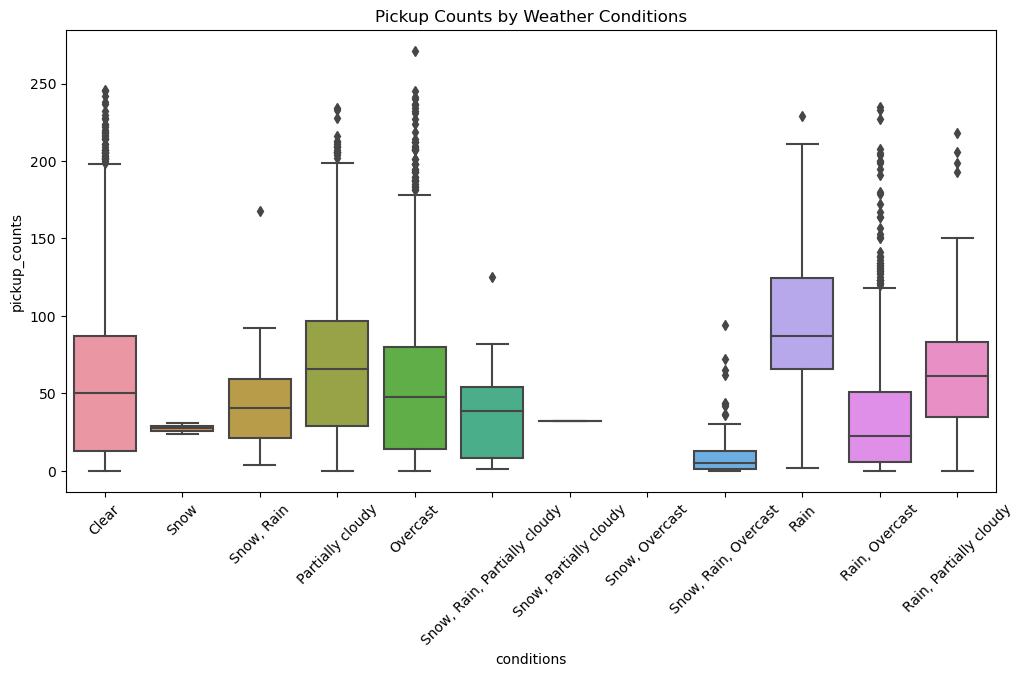

In [29]:
import seaborn as sns

# Weather Condition Analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x='conditions', y='pickup_counts', data=w_pickups)
plt.title('Pickup Counts by Weather Conditions')
plt.xticks(rotation=45)
plt.show()

Correlation Heatmap

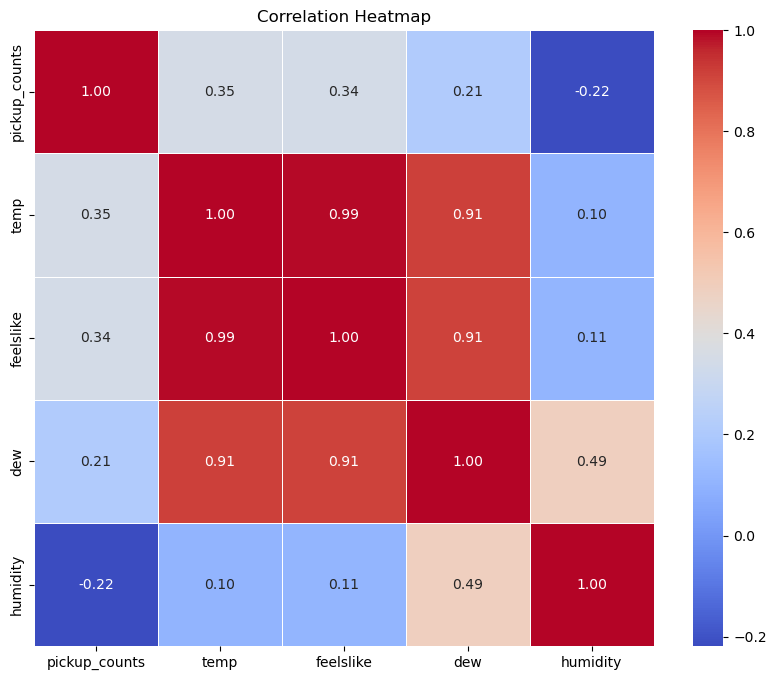

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for correlation analysis
correlation_data = w_pickups[['pickup_counts', 'temp', 'feelslike', 'dew', 'humidity']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

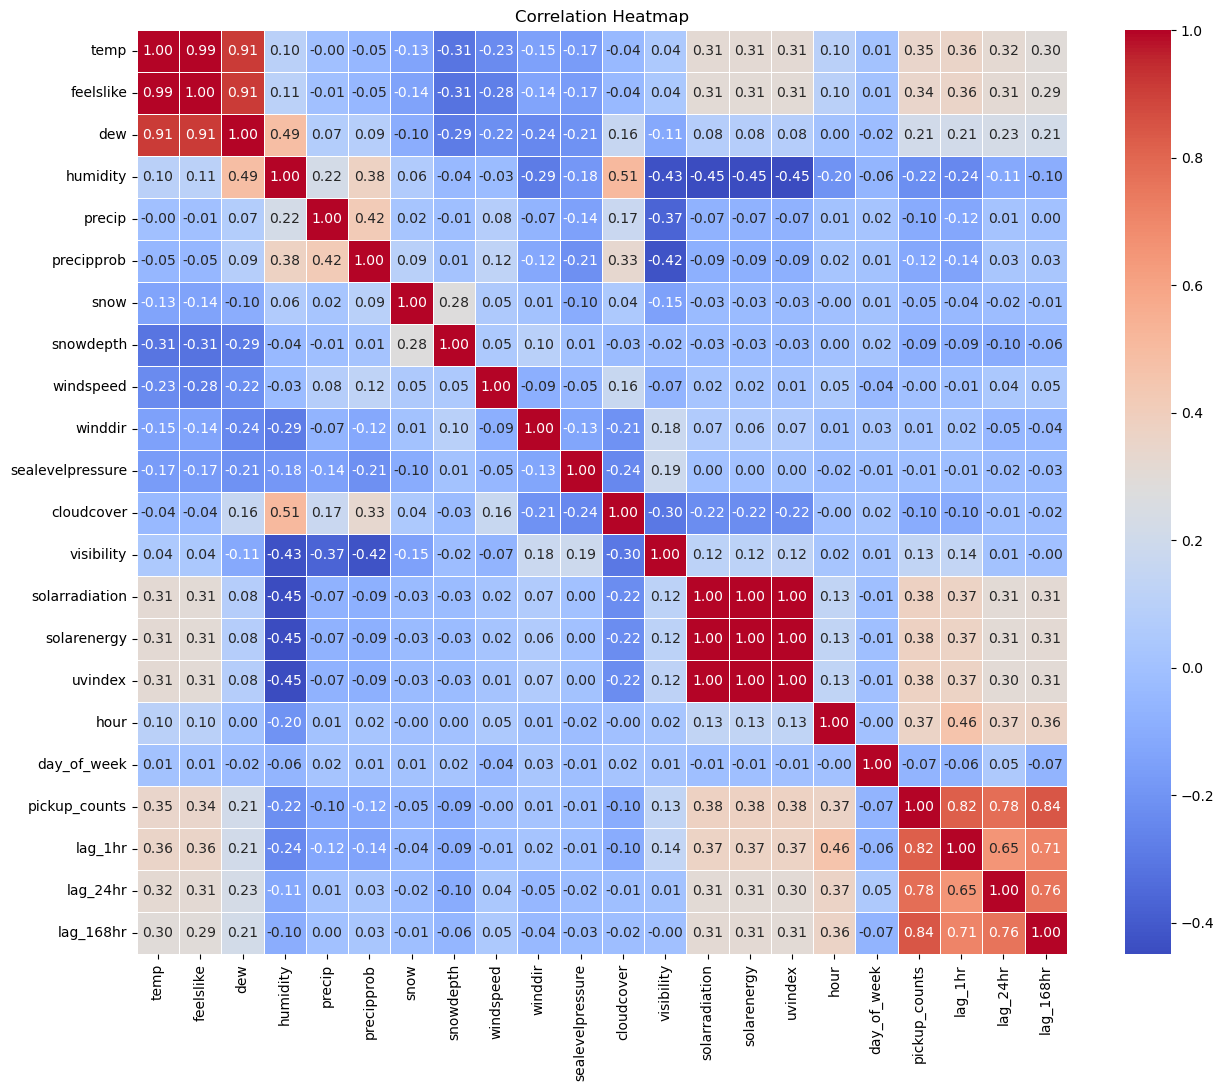

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for correlation analysis
correlation_data = w_pickups.drop(['datetime', 'name', 'conditions', 'icon', 'stations', 'date'], axis=1)

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Create a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


# Print the columns to verify their existence
print("Columns before dropping:", w_pickups.columns)

# Drop unnecessary columns
w_pickups = w_pickups.drop(['name', 'icon', 'stations', 'date'], axis=1, errors='ignore')

# Print the columns after dropping
print("Columns after dropping:", w_pickups.columns)

# Drop rows with NaN values resulting from lag operations
w_pickups = w_pickups.dropna()

# Select specific weather-related features
weather_features = w_pickups[['temp', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'snow', 'snowdepth']]

# Split the data into features (X) and target variable (y)
X = weather_features
y = w_pickups['pickup_counts']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = make_pipeline(StandardScaler(), LinearRegression())

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Optionally, you can print the coefficients of the model
print('Coefficients:', model.named_steps['linearregression'].coef_)


Columns before dropping: Index(['name', 'datetime', 'temp', 'feelslike', 'dew', 'humidity', 'precip',
       'precipprob', 'snow', 'snowdepth', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       'solarenergy', 'uvindex', 'conditions', 'icon', 'stations', 'date',
       'hour', 'day_of_week', 'pickup_counts', 'lag_1hr', 'lag_24hr',
       'lag_168hr'],
      dtype='object')
Columns after dropping: Index(['datetime', 'temp', 'feelslike', 'dew', 'humidity', 'precip',
       'precipprob', 'snow', 'snowdepth', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       'solarenergy', 'uvindex', 'conditions', 'hour', 'day_of_week',
       'pickup_counts', 'lag_1hr', 'lag_24hr', 'lag_168hr'],
      dtype='object')
Mean Squared Error: 1775.0388051288355
Coefficients: [ 16.74174453  -5.20470563   7.19355174 -14.82892563  -2.39424157
   1.11557296  -0.26682799  -0.80330408]


Fit and plot our linear regression model.

R^2: 0.17504117801732877


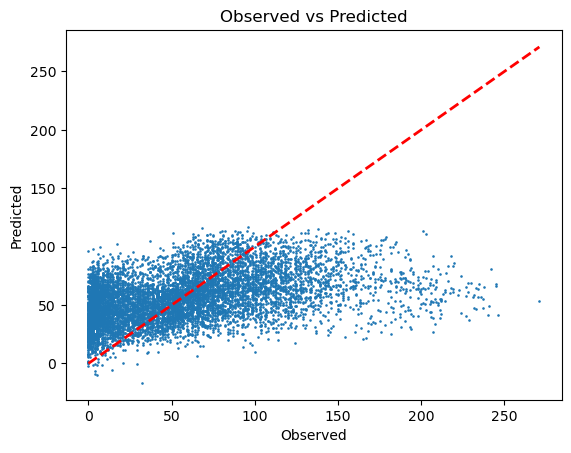

In [33]:
#Linear Regression model
r_squared = model.score(X_test, y_test)
print(f'R^2: {r_squared}')

y_pred_all = model.predict(X)

# Scatter plot
plt.scatter(y, y_pred_all, s=0.75)
plt.ylabel("Predicted")
plt.xlabel("Observed")
plt.plot([min(y), max(y)], [min(y), max(y)], color="red", linestyle='--', linewidth=2)  
plt.title("Observed vs Predicted")
plt.show()

Implementing a polynomial regression model.

In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create a pipeline with polynomial features and a linear regression model
degree = 2  
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model on the training data
poly_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_poly = poly_model.predict(X_test)

# Calculate R-squared for the polynomial model
r_squared_poly = poly_model.score(X_test, y_test)
print(f'R-squared (polynomial): {r_squared_poly}')


R-squared (polynomial): 0.03505033466558627


Implementing a random forest model

In [35]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Calculate R-squared for the Random Forest model
r_squared_rf = rf_model.score(X_test, y_test)
print(f'R-squared (Random Forest): {r_squared_rf}')


R-squared (Random Forest): 0.14226578422731107


Implementing a gradient boosting model

In [36]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(random_state=42)

# Fit the model on the training data
gb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gb = gb_model.predict(X_test)

# Calculate R-squared for the Gradient Boosting model
r_squared_gb = gb_model.score(X_test, y_test)
print(f'R-squared (Gradient Boosting): {r_squared_gb}')

R-squared (Gradient Boosting): 0.21204125937436835


In [37]:
# Print the columns to verify their existence
print("Columns before dropping:", w_pickups.columns)

# Drop unnecessary columns
w_pickups = w_pickups.drop(['name', 'icon', 'stations', 'date'], axis=1, errors='ignore')

# Print the columns after dropping
print("Columns after dropping:", w_pickups.columns)

Columns before dropping: Index(['datetime', 'temp', 'feelslike', 'dew', 'humidity', 'precip',
       'precipprob', 'snow', 'snowdepth', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       'solarenergy', 'uvindex', 'conditions', 'hour', 'day_of_week',
       'pickup_counts', 'lag_1hr', 'lag_24hr', 'lag_168hr'],
      dtype='object')
Columns after dropping: Index(['datetime', 'temp', 'feelslike', 'dew', 'humidity', 'precip',
       'precipprob', 'snow', 'snowdepth', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       'solarenergy', 'uvindex', 'conditions', 'hour', 'day_of_week',
       'pickup_counts', 'lag_1hr', 'lag_24hr', 'lag_168hr'],
      dtype='object')


In [38]:
features = w_pickups[['temp', 'precip', 'lag_1hr', 'lag_24hr', 'lag_168hr']]
target = w_pickups['pickup_counts']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Check for Nvidia GPU
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

# Create a Neural Network model with 3 hidden layers
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)
        self.fc2 = nn.Linear(hidden_size, hidden_size)  
        self.fc3 = nn.Linear(hidden_size, 1)  

    def forward(self, X):
        out = self.fc1(X)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)

        return out
    
# Define the model
model = NeuralNet(8, 64).to(device)

# Define the loss function and the optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Convert the data to PyTorch tensors and send them to device
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).to(device)


# Train the model
start_time = time()
epochs = 200
train_losses = []
test_losses = []
rmse_list = []
for i in range(epochs):
    y_pred = model(X_train_tensor)
    loss = torch.sqrt(criterion(y_pred, y_train_tensor))
    train_losses.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test_tensor)
        loss = torch.sqrt(criterion(y_pred, y_test_tensor))
        test_losses.append(loss.item())
        rmse = np.sqrt(mean_squared_error(y_test_tensor.cpu().detach().numpy(), y_pred.cpu().detach().numpy()))
        rmse_list.append(rmse)

    if i % 100 == 0:
        print(f'Epoch {i} train loss: {loss.item()}')
        print(f'Progress: {(i + 1) / epochs * 100:.2f}%')

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train loss')
plt.plot(test_losses, label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(rmse_list, label='RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.savefig(os.path.join('plots', 'nn_train_test_loss.png'))
plt.show()


RuntimeError: mat1 and mat2 shapes cannot be multiplied (6738x5 and 8x64)

In [ ]:
plt.plot(y_pred.cpu().detach().numpy(), label='Predicted')
plt.plot(y_test_tensor.cpu().detach().numpy(), label='Actual', alpha=0.5)
plt.xlabel('Test samples')
plt.ylabel('Pickup counts')
plt.legend()
plt.savefig(os.path.join('plots', 'nn_predictions.png'))
plt.show()
